<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/trade_balance/trade_balance_prepro_and_visualization_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 貿易収支データの分析

## ここからの2時間でやること


*   日本の貿易収支データの取得(command)
*   データの読み込み（sqlite3 / pandas）
*   データの整形(pandas)
*データの可視化(plotly/dash)
*   国別のクラスタリング(sklearn)


## データの出典情報

1. https://www.kaggle.com/zanjibar/japan-trade-statistics
2. https://www.kaggle.com/zanjibar/japantradestatistics2

1.2.共にライセンスは https://creativecommons.org/licenses/by-sa/4.0/ です。

## データの簡単な紹介

このデータは https://www.kaggle.com/zanjibar さんによる日本の国際貿易に関するものです。毎月更新されています！データはデータベースに格納されています。

## 課題1

https://www.kaggle.com/zanjibar/japan-trade-statistics
https://www.kaggle.com/zanjibar/japantradestatistics2

にどのような情報があるかざっとながめてみましょう。

## Japan trade statistics のデータの取得と解凍

- https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
- https://www.dropbox.com/s/ej8pj7tflk11cuu/trade_meta_data.db?dl=1
- https://www.dropbox.com/s/jp03pp2gr14bmk0/codes.db?dl=1

からデータをダウンロードします。
(データ取得の利便性のために以降の分析で用いるデータのみを再配布しています。データのライセンスがCC-by-sa 4.0であるため再配布が可能です。)

!の後にLinuxコマンドを書くとそのセルの命令はPythonのプログラムではなくLinuxのコマンドとして実行されます。

- wget はデータをダウンロードするのに使うことができるLinuxのコマンドです。
- mv はファイルをリネームをするのに使うことができるLinuxのコマンドです。


In [1]:
# jupyter_dashのインストールとplotlyの更新
!pip install jupyter_dash 
!pip install --upgrade plotly

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 1.2MB 12.7MB/s 
     |████████████████████████████████| 3.4MB 17.8MB/s 
     |████████████████████████████████| 194kB 47.4MB/s 
     |████████████████████████████████| 1.8MB 40.8MB/s 
     |████████████████████████████████| 358kB 40.8MB/s 
  Created wheel for dash: filename=dash-1.15.0-cp36-none-any.whl size=80892 sha256=3ca485872ae2a485a7dca590406f80f256217fe98b77b4902ba4608daa85dc7a
  Stored in directory: /root/.cache/pip/wheels/d7/47/47/83e04669b545172324bae30853a71afe2962b733c568a229fe
  Created wheel for ansi2html: filename=ansi2html-1.5.2-cp36-none-any.whl size=13862 sha256=22980c5cc2cd2b54d5c5dc769917037847793db35e0a9fdcec674071c8ed666b
  Stored in directory: /root/.cache/pip/wheels/f9/ea/e0/1ed3c3945ce073f930f3e5aa2b9bbadb03cd2efc8f8695cd61
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5272

In [2]:
!wget https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
!wget https://www.dropbox.com/s/ej8pj7tflk11cuu/trade_meta_data.db?dl=1
!wget https://www.dropbox.com/s/jp03pp2gr14bmk0/codes.db?dl=1
!mv y_1997.db?dl=1 y_1997.db
!mv trade_meta_data.db?dl=1 trade_meta_data.db
!mv codes.db?dl=1 codes.db

--2020-08-27 23:26:09--  https://www.dropbox.com/s/xsmjypizhhastyr/y_1997.db?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/xsmjypizhhastyr/y_1997.db [following]
--2020-08-27 23:26:10--  https://www.dropbox.com/s/dl/xsmjypizhhastyr/y_1997.db
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30d7c518d6f420a2c886cfd927.dl.dropboxusercontent.com/cd/0/get/A-Tvbd_Hgm8Y2L-nlEMKbB_9zG3HcsTImTr5X3QpuB_bpymJtwBD5xtlQBR7Vvo4evGSgQ5MoGbpPUo6mmHg-ozJVzH188mWtUH4egt0IEebRA/file?dl=1# [following]
--2020-08-27 23:26:10--  https://uc30d7c518d6f420a2c886cfd927.dl.dropboxusercontent.com/cd/0/get/A-Tvbd_Hgm8Y2L-nlEMKbB_9zG3HcsTImTr5X3QpuB_bpymJtwBD5xtlQBR7Vvo4evGSgQ5MoGbpPUo6mmHg-ozJVzH188mWtUH4egt0IEebRA/file?dl=1
Resolving uc30d7c518d

## ダウンロードの確認

- ダウンロードが終了したら、ファイルを確認してください
- ファイルの確認は右の一番下のアイコンから出来ます
- 3つのファイルがダウンロードされたことが確認できます

## データの読み込み
- 次にダウンロードしたデータを読み込みます
- データベースの読み込みには、sqlite3とpandasを用います
- まずはDBにあるテーブルを調べます（これはsqlite3のみを使う）


In [ ]:
import sqlite3 
import pandas as pd
import numpy as np

In [ ]:
# まずはDBに含まれるテーブルを参照する
conn = sqlite3.connect('/content/y_1997.db') # dbに接続
cursor = conn.cursor() # cursorオブジェクトを作成し、
cursor.execute('select * from sqlite_master where type="table"') #sqlコマンドを実行
print(cursor.fetchall()) # 実行したものをすべて取得
conn.close() # dbへの接続を閉じる

[('table', 'year_from_1997', 'year_from_1997', 2, 'CREATE TABLE "year_from_1997" (\n"index" INTEGER,\n  "exp_imp" INTEGER,\n  "Year" INTEGER,\n  "Country" TEXT,\n  "Unit1" TEXT,\n  "Unit2" TEXT,\n  "Q1" INTEGER,\n  "Q2" INTEGER,\n  "Value" INTEGER,\n  "hs2" TEXT,\n  "hs4" TEXT,\n  "hs6" TEXT,\n  "hs9" TEXT\n)')]


- 上ではy_1997.dbに含まれるテーブルを調べました
- このdbには"year_from_1997"というテーブルが含まれることが分かりました

## 課題2
- code.dbとtrade_meta_data.dbに含まれるテーブル名を調べてください
- 次にテーブル名のみを持つリストを作成し、変数に渡してください

## テーブルを読み込む
- 次にDBのテーブルを読み込みます
- ここではsqlite3とPandasを用います
- まずはcodes.dbのcountry_jpnのテーブルを全て読み込みます

In [ ]:
conn = sqlite3.connect('/content/codes.db')
sql = 'select * from country_eng'
df = pd.read_sql(sql, conn)
conn.close()
df.head()

,Country,Country_name,Area
0,103,Korea,Asia
1,104,North_Korea,Asia
2,105,China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


- sqlコマンドでは列の選択、グルーピングなど、様々な操作ができます
- 次に、y_1997.dbのテーブル"year_from_1997"から、"exp_imp"、"Year"、"Country"、"Value"列を読み込みます
- "exp_imp", "Country", "Year"でグループバイし、Valueを合計します
- Pandasでも同様の操作ができるのですが、今回はsqlで行います

In [ ]:
conn = sqlite3.connect('/content/y_1997.db')
sql = 'select Country, exp_imp, Year, sum(Value) as Value from year_from_1997 group by Country, exp_imp, Year'
trade_hist = pd.read_sql(sql, conn)
conn.close()

In [ ]:
trade_hist

,Country,exp_imp,Year,Value
0,103,1,1997,3153238334
1,103,1,1998,2004542479
2,103,1,1999,2606234190
3,103,1,2000,3308751342
4,103,1,2001,3071870837
...,...,...,...,...
10217,702,2,2016,183523
10218,702,2,2017,330381
10219,702,2,2018,490757
10220,702,2,2019,247949


## 課題3
- 日本の各年の輸出入の合計のデータを作成してみましょう

## 英語国名を割り当てる
- データが読み込めましたが、これを見ても国名は分かりません
- exp_impは輸出入のタグなのですが、１が何か、2が何か？慣れていないとわかりません
  - 1が輸出、2が輸入です
- そのため、表データにそれぞれをあたらな項目として加えます
- そのような際によく使うのがPandasのmapメソッドとlambda式です
  - mapメソッド　https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
  - lambda式 https://docs.python.org/ja/3/reference/expressions.html?highlight=lambda
- mapメソッドはシリーズの列に対して、関数や辞書などを適用するメソッドです

In [ ]:
# まずは輸出入
exp_imp_dict = {1: '輸出', 2: '輸入'}
trade_hist['輸出入'] = trade_hist['exp_imp'].map(exp_imp_dict)
trade_hist.head()

,Country,exp_imp,Year,Value,輸出入
0,103,1,1997,3153238334,輸出
1,103,1,1998,2004542479,輸出
2,103,1,1999,2606234190,輸出
3,103,1,2000,3308751342,輸出
4,103,1,2001,3071870837,輸出


### 国名も処理を

- まずは国番号と国名のテーブルを用いて、辞書を作成する
- そして、それをそのまま割り当てる！！かんたーんとなりそうですが、作業を進めていくと、のちのち作業がうまくいかなくなる問題が発生します
- それは国名がない、国番号がある問題です
- そのために、ここではそれに対応する関数を作成し、mapメソッドとlambda式でそれを割り当てます

In [ ]:
# まずはアルファベットの国名の辞書を作る
counts = df[['Country', 'Country_name']]
counts = counts.set_index('Country')
country_dict = counts.to_dict()['Country_name']
# mapを使って同様に

In [ ]:
def select_country(x):
  n = 0
  try:
    return country_dict[x]
  except:
    n += 1
    return f'不明_{n}'

trade_hist['country_name'] = trade_hist['Country'].map(lambda x: select_country(x))

# Plotlyを使ってデータを可視化する
- Plotlyはグラフを描画するためのPythonパッケージです
   - https://plotly.com/python/
- Colabにプリインストールされているものの、バージョンが古いため、pip install --upgrade plotlyで更新してから使います[初めに行っています]
- まずはPlotlyExpressという、plotlyのラッパ（簡単に使えるモジュール）を使って可視化します
- PlotlyExpressの使い方としては関数名をグラフの種類の選択したあと、データフレームを渡し、そのあとの引数に使いたい列名を渡します
  - https://plotly.com/python/plotly-express/

In [ ]:
import plotly.express as px

### 韓国の輸出入のデータの線グラフを作成します
- 韓国のみのdataframeを作成し、line関数に渡して作成します。
- 私はちょっとqueryメソッドが分かり難いので使っていませんが、こちらを使った方が良いかもです
  - query https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

In [ ]:
trade_korea = trade_hist[trade_hist['country_name'] == 'Korea']
px.line(trade_korea, x='Year', y="Value", color='輸出入')

- x軸は年度を
- 系列1は輸出の金額を
- 系列2は輸入の金額を

表します。

- 次にtreemapグラフを作成します
- 全体に占める割合など見れて面白いです
- 輸出、輸入を切り口に全体がどのような感じが見てみます


In [ ]:
trade_hist_side = trade_hist[trade_hist['exp_imp'] == 2]
trade_hist_side['board'] = 'JP_TOTAL'
px.treemap(trade_hist_side, path=['board', 'Year', 'country_name'],values="Value")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- このような複雑なグラフも簡単に作成できます
- 使い方のおすすめは複雑なグラフで全体像をとらえ、シンプルなグラフで細部を捉えるという使い方です。
- 今日はちょっと時間がなくて扱えないのですが、その辺りをdashで作ると、非常に可視化でデータの特徴がとらえやすくなります。

## 課題4
- PlotlyExpressのサイトを見ながら、何か他のグラフを作成してみてください
    - https://plotly.com/python/plotly-express/


## 次にPlotlyExpressでできないことを見てみます

`isin`メソッドは各セルがその値を含むかどうかを返します。それを使って複数国のデータフレームを作り、それを線グラフで可視化します。

In [ ]:
two_country = trade_hist[trade_hist['country_name'].isin(['China', 'Switzerland'])]

In [ ]:
two_country

,Country,exp_imp,Year,Value,輸出入,country_name
70,105,1,1997,2630720664,輸出,China
71,105,1,1998,2620905420,輸出,China
72,105,1,1999,2657428102,輸出,China
73,105,1,2000,3274447888,輸出,China
74,105,1,2001,3763723102,輸出,China
...,...,...,...,...,...,...
2816,215,2,2015,894828377,輸入,Switzerland
2817,215,2,2016,831781020,輸入,Switzerland
2818,215,2,2017,876989093,輸入,Switzerland
2819,215,2,2018,857320750,輸入,Switzerland


In [ ]:
px.line(two_country, x='Year', y='Value', color='exp_imp')

### Plotly Expressでは無理です

この場合、値を色で分けきれないので可視化することができません。

### Plotly Graph Objectsを使います

- ちょっと手がかかるデータを可視化する場合、Plotly Graph Objects(go)でグラフを作成します。
- goでグラフを作成する場合は次の順で作成します
  - Figureインスタンスを作成する（➊）
  - add_traceメソッドでtraceをFigureインスタンスに加える（➋）
  - figをshowメソッドで描画する（➌）
  - layoutを更新したい場合、update_layoutメソッドで更新しますが今回は行いません。




In [ ]:
# 基本的なgoの使い方
fig = go.Figure()

trade_korea_exp = trade_korea[trade_korea['exp_imp'] == 1]
trade_korea_imp = trade_korea[trade_korea['exp_imp'] == 2]
fig.add_trace(go.Scatter(x=trade_korea_exp['Year'], y=trade_korea_exp['Value'], name='exp'))
fig.add_trace(go.Scatter(x=trade_korea_imp['Year'], y=trade_korea_imp['Value'], name='imp'))

fig.update_layout(go.Layout(title="Trade Amount with Korea"))

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
two_countries = ['Korea', 'China']
data_two = trade_hist[trade_hist['country_name'].isin(two_countries)]
fig = go.Figure() #➊

for cnt in two_countries:
  data_one = data_two[data_two['country_name'] == cnt]
  data_one_exp = data_one[data_one['exp_imp'] == 1]
  data_one_imp = data_one[data_one['exp_imp'] == 2]

  fig.add_trace(go.Scatter(x=data_one_exp['Year'], y=data_one_exp['Value'], name=f'{cnt} 輸出')) #➋
  fig.add_trace(go.Scatter(x=data_one_imp['Year'], y=data_one_imp['Value'], name=f'{cnt} 輸入'))

fig.show() # ❸

### 複数のグラフを描画する
- PlotlyExpressでは現在、関数を使った場合複数のグラフを描画できますが、普通はグラフを複数並べて表示することはできません
- goではmake_subplotsを用いて作成します。

In [ ]:
china = trade_hist[trade_hist['country_name'] == 'China']
china_exp = china[china['exp_imp'] == 1].reset_index(drop=True)
china_imp = china[china['exp_imp'] == 2].reset_index(drop=True)
china_balance = china_exp['Value'] - china_imp['Value']
china_balance = pd.concat([china_exp['Year'], china_balance], axis=1)

fig = make_subplots(rows=2, cols=1)


fig.add_trace(go.Scatter(x=china_exp['Year'], y=china_exp["Value"], name='輸出'), row=1, col=1)
fig.add_trace(go.Scatter(x=china_imp['Year'], y=china_imp["Value"], name='輸入'), row=1, col=1)
fig.add_trace(go.Bar(x=china_balance['Year'], y=china_balance['Value'], name='trade_balance'), row=2, col=1)

fig.update_layout(go.Layout(title=f'貿易収支(China)'))

fig.show()

図の下の方の棒グラフの縦軸は輸出額から輸入額を引いた貿易収支を表します。

- 次のように複数国のグラフを作成することもできます

In [ ]:
fig = make_subplots(rows=2, cols=1)

for cnt in ['China', 'Switzerland', 'United_States_of_America']:
  selected_df = trade_hist[trade_hist['country_name'] == cnt]
  selected_exp = selected_df[selected_df['exp_imp'] == 1].reset_index(drop=True)
  selected_imp = selected_df[selected_df['exp_imp'] == 2].reset_index(drop=True)
  trade_balance = selected_exp['Value'] - selected_imp['Value'] 
  trade_balance = pd.concat([selected_exp['Year'], trade_balance], axis=1)
  fig.add_trace(go.Scatter(x=selected_exp['Year'], y=selected_exp['Value'], name=f'{cnt}: 輸入'), row=1, col=1)
  fig.add_trace(go.Scatter(x=selected_imp['Year'], y=selected_imp['Value'], name=f'{cnt}: 輸出'), row=1, col=1)
  fig.add_trace(go.Bar(x=trade_balance['Year'], y=trade_balance['Value'], name=f'{cnt}: trade_balance'), row=2, col=1)

fig.show()

### Dashでインタラクティブに作成
- 各国の輸出、輸入を2つのグラフに分けて観察するアプリ
- 1つの国のデータをどんどん追加していくアプリ

- DashはPlotlyを含むPythonのウェブフレームワークです
  - https://dash.plotly.com/
- React, Plotly, Flaskから作成されており、簡単にReactをPythonから使えるラッパであるとも表現できます
- 様々なツールと組み合わせてグラフをインタラクティブに動かすことができます
  - コンポーネントを組み合わせてアプリを作成します
  - コンポーネントは8個ほど提供されており、自作もできます
  - 今回はコンポーネントの中からhtmlを作成するdash_html_componentsとツールを持つdash_core_componentsを用います　
- jupyterdashはDashをJupyter上で使えるようにするPythonパッケージです

In [ ]:
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 

from dash.dependencies import Input, Output, State

### Dashのコンポーネント、レイアウト

In [ ]:
# Dashアプリケーションの作り方
app = JupyterDash(__name__) # JupyterDashインスタンスを作成

app.layout = html.H1("HELLO PyConJP 2020!!") # コンポーネントをレイアウト属性に渡す

app.run_server(mode='inline') # run_serverメソッドでアプリケーションを動かす

<IPython.core.display.Javascript object>

In [ ]:
app = JupyterDash(__name__)

# 複数のコンポーネントを組み合わせる場合、Divコンポーネントを利用します
# children属性にリストに格納してコンポーネントを渡します
# Graphコンポーネントのfigure属性にplotlyで描画するグラフを渡し、アプリケーションにグラフを表示します
app.layout = html.Div([
                       html.H1('Hello PyConJP Tutorial!!'),
                       dcc.Graph(figure=px.line(x=[1,2,3,4,5], y=[2,4,6,4,2]))
])

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

- ここまで見たように、dashアプリケーションはコンポーネントの属性（引数）に対して、文字などのデータを渡してレイアウトを作成します
- コンポーネントの属性はどれを使っているか意識してください
- 次のコールバックで活用します

### Dashのコールバック
- このままでは普通のグラフと変わりありません
- コールバックを利用してアプリケーションを動的に動かします
- ドロップダウンでグラフの種類を選択し、ボタンを押すとグラフの種類が更新されるアプリケーションを作成します

In [ ]:

app = JupyterDash(__name__)

# グラフの種類を選択するのに用いるリストを作成します。
graph_type_list = [px.line, px.scatter, px.bar]

app.layout = html.Div([
    # ドロップダウンコンポーネントの作成。id名を設定します。
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': type_.__name__, 'value': num} for num, type_ in enumerate(graph_type_list)],
        value = 0
    ),
    html.Button(
        id='my_button',
        children='Update Graph'
    ),
    dcc.Graph(
        # グラフはコールバックで作成するので、id名のみを渡します。
        id='my_graph',
    ),
])

# コールバックはapp.callbackデコレータを持つ関数です。
# デコレータではそれぞれに用いるコンポーネントの属性を指定します。

# Outputはコールバックで処理したデータの出力先の属性を指定します。この場合、関数内でグラフを作成し、それをid名my_graphのfigure属性に返します。
# Inputはコールバックを呼び出すのに用いる属性を指定します。この場合、ボタンのn_clicks属性を指定します。n_clicks属性はボタンの押された回数を数えており、
# その値が変化するとコールバックが呼び出されます。
# Stateはコールバックで状態を用いる属性を指定します。この場合、ドロップダウンの値を用います。

# 関数
# 関数の名前、引数名は任意で付けられます。
# 関数の引数には、Input, Stateで指定した属性が割り当てられます。この場合はボタンのn_clicks属性、ドロップダウンのvalue属性です。


@app.callback(Output('my_graph', 'figure'),
             [Input('my_button', 'n_clicks')],
            [State('my_dropdown', 'value')]
            )
def update_graph(n_clicks, selected_value):
    return graph_type_list[selected_value](x=[1,2,3,4,5], y=[1,2,3,4,5])

app.run_server(mode='inline')


<IPython.core.display.Javascript object>

### コールバックのポイント
- 利用するコンポーネントにid名を付ける
- id名と属性名を用いて、コールバック関数にどのように使うかを指定する

### 貿易収支を使ったアプリケーション
- ドロップダウンで国名を選択すると、その国の輸出入額がグラフに表示される
- 国名は複数選択可能
- グラフは輸出と輸入で二つに分ける


In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div([
                       
      html.Div([
                dcc.Dropdown(id='country_selector',
                             options=[{'label': cnt, 'value': cnt} for cnt in trade_hist['country_name'].unique()],
                             value=['China'],
                             multi=True,
                             style={'width': '80%', 'display': 'inline-block'})
      ]),
      html.Div([
                # styleで、CSSが当てられる。
                # またそれで、グラフを配置できるので、複数グラフを並べるときにもPlotlyExpressが使える
                dcc.Graph(id='exp_graph', style={'width': '48%', 'display': 'inline-block'}),
                dcc.Graph(id='imp_graph', style={'width': '48%', 'display': 'inline-block'})

      ])


])

@app.callback([Output('exp_graph', 'figure'), Output('imp_graph', 'figure')],
              [Input('country_selector', 'value')]
              )
def update_graph(selected_countries):
  selected_df = trade_hist[trade_hist['country_name'].isin(selected_countries)]
  selected_exp = selected_df[selected_df['exp_imp'] == 1]
  selected_imp = selected_df[selected_df['exp_imp'] == 2]
  fig1 = px.line(selected_exp, x='Year', y='Value', color='country_name', title='輸出')
  fig2 = px.line(selected_imp, x='Year', y='Value', color='country_name', title='輸入')
  return fig1, fig2


app.run_server(mode='inline')

<IPython.core.display.Javascript object>

上記ダッシュボードの説明ポイント


1.   ドロップダウンでの選択が反映されグラフが更新される
2.   シンプル。しかし、今までのようにほかのデータを見るためにJupyter上でshift + enterを押しまくらなくてよい



### Pattern Matching Callback
- 先ほどのコールバックの作り方では、コールバックは事前に準備したものしか使えなかった
- 例えば、新たに発生させたコンポーネントに対するコールバックを作るのは不可能
- しかしPMCを用いることにより、それが可能となった

#### ポイント
- id名を辞書で与える
- MATCH, ALL, ALLSMALLERなどのセレクターで、パターンを指定する

#### 作成するアプリケーション
- ドロップダウンで国名を選択すると、線グラフを表示するコンポーネントが、ボタンを押すと発生する。

In [ ]:
from dash.dependencies import MATCH

In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div(
    [
        html.Button("PUSH ME", id="my_button", n_clicks=0),
        html.Div(id="my_div", children=[]),
    ]
)


@app.callback(
    Output("my_div", "children"),
    [Input("my_button", "n_clicks")],
    [State("my_div", "children")],
    prevent_initial_call=True,
)
def update_layout(n_clicks, exist_children):
    add_layout = html.Div(
        [
            dcc.Dropdown(
                id={"type": "my_dropdown", "index": n_clicks},
                options=[
                    {"value": cnt, "label": cnt}
                    for cnt in trade_hist["country_name"].unique()
                ],
                value=trade_hist["country_name"].unique()[n_clicks - 1],
            ),
            dcc.Graph(id={"type": "add_graph", "index": n_clicks}),
        ], style={'width': '23%', 'display': 'inline-block', 'margin': '1%'}
    )
    exist_children.append(add_layout)
    return exist_children


@app.callback(
    Output({"type": "add_graph", "index": MATCH}, "figure"),
    [Input({"type": "my_dropdown", "index": MATCH}, "value")],
)
def update_graph(selected_country):
    selected_df = trade_hist[trade_hist["country_name"] == selected_country]
    return px.line(
        selected_df,
        x="Year",
        y="Value",
        color="exp_imp",
        title=f"{selected_country}の輸出入額（1:輸出, 2:輸入）",
    )

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

上記ダッシュボードの説明ポイント


1.   Divコンポーネントのchildren属性にどんどんコンポーネントを追加していく
2.   コンポーネントのindexが合致しているドロップダウンとグラフの動作が連動する

## 課題5
- 便利に貿易収支を見られるDashアプリケーションを作ってみよう

参考：https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

## 機械学習の例：クラスタリング

ここでは機械学習の例として教師なし学習の一つであるクラスタリングを各国の輸出時系列データに適用します。クラスタリングによって、時系列データをその変化のパターンに基づいて複数のクラスに分類することができます。

### データの整形

機械学習を適用しやすくするため、データをNumpy配列に変換します。その前準備として、クラスタリングの適用対象とする国名を取得します。最後の3要素は国名ではなさそうなので、対象から除外します。

In [ ]:
country_names = trade_hist['country_name'].unique()
print(country_names[-3:])
country_names = country_names[:-3]

['For_Order' 'Unknown' 'Bonded_Manufacturing_Warehouse']


これらの国の輸出入の時系列をリストに保存します。

In [ ]:
ys1_all = [] # "1" の年
ys2_all = [] # "2" の年
vs1_all = [] # "1" の数値
vs2_all = [] # "2" の数値

for c in country_names:
  tmp = trade_hist[trade_hist['country_name'] == c]
  tmp1 = tmp[tmp["exp_imp"] == 1]
  tmp2 = tmp[tmp["exp_imp"] == 2]
  ys1_all.append(tmp1["Year"].values)
  ys2_all.append(tmp2["Year"].values)
  vs1_all.append(tmp1["Value"].values)
  vs2_all.append(tmp2["Value"].values)

各国の記録されている年数を確認します。

In [ ]:
import numpy as np
for n in np.unique([len(c) for c in ys1_all]):
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys1_all if len(y) == n])))
  print("len(years) = {}: n = {}".format(n, len([1 for y in ys2_all if len(y) == n])))

len(years) = 6: n = 1
len(years) = 6: n = 0
len(years) = 8: n = 1
len(years) = 8: n = 1
len(years) = 9: n = 2
len(years) = 9: n = 1
len(years) = 10: n = 2
len(years) = 10: n = 1
len(years) = 11: n = 2
len(years) = 11: n = 1
len(years) = 13: n = 2
len(years) = 13: n = 1
len(years) = 14: n = 1
len(years) = 14: n = 2
len(years) = 19: n = 2
len(years) = 19: n = 3
len(years) = 20: n = 1
len(years) = 20: n = 2
len(years) = 21: n = 1
len(years) = 21: n = 10
len(years) = 22: n = 1
len(years) = 22: n = 8
len(years) = 23: n = 212
len(years) = 23: n = 186
len(years) = 46: n = 1
len(years) = 46: n = 1


多くの国（187）で、"1"と"2"の両方で23年分のデータがあります。MLを適用するためには固定長のデータが都合が良いので、データをスクリーニングします。最初に年度の配列を作成します。

In [ ]:
ys = np.array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

`ys`に含まれる全ての年の記録を含む国を抽出します。

In [ ]:
ys1_all2 = []
ys2_all2 = []
vs1_all2 = []
vs2_all2 = []

for ys1_, ys2_, vs1_, vs2_ in zip(ys1_all, ys2_all, vs1_all, vs2_all):
  cond1 = set(ys1_) == set(ys)
  cond2 = set(ys2_) == set(ys)
  if cond1 and cond2:
    assert (ys1_ - ys).sum() == 0 and (ys2_ - ys).sum() == 0
    vs1_all2.append(vs1_)
    vs2_all2.append(vs2_)

ValueError: ignored

データを行列に変換します。これで187カ国の23年分の貿易輸出入データがnumpy配列に保存されました。

In [ ]:
vs1_all3 = np.vstack(vs1_all2)
vs2_all3 = np.vstack(vs2_all2)
assert vs1_all3.shape == vs2_all3.shape == (187, 23)

NameError: ignored

In [ ]:
vs1_all3.shape

NameError: ignored

### クラスタリング

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
labels = model.fit_predict(vs1_all3)

クラス平均ベクトルをプロットします。

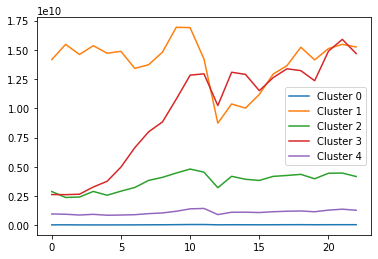

In [ ]:
import matplotlib.pyplot as plt
for i in np.arange(5):
  plt.plot(model.cluster_centers_[i, :], label="Cluster {}".format(i))
plt.legend()

貿易量の多さで分類されているようです。これでも意味はありますが、時間的な傾向の違いで分類したい場合、何らかの方法でデータを正規化するのが良いでしょう。